# Classifying Dog and Cat using CNN on Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**Dataset:** The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat
<br>
It was only effectively addressed in the last few years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop convolutional neural network model for classifying the images or Dog Vs cat
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layers check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy


####**Dataset Description**



The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images 


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


####**Skills Gained**

 TensorFlow 2.x 
- Convolutional neural network implementation
- Model Improvisation
- Model Save
- Load the pretrained model


# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x

##Pre-process  the Dataset 


#####<b>Before start coding please enable your GPU





![alt text](https://i.imgur.com/QGIPBWR.png)

#### <b> Load the  Dataset

In [ ]:
#!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

#### <b> Unzip the  Data

In [ ]:
#!unzip training_set.zip
!unzip test_set.zip

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib
(374, 500, 3) <class 'numpy.ndarray'>


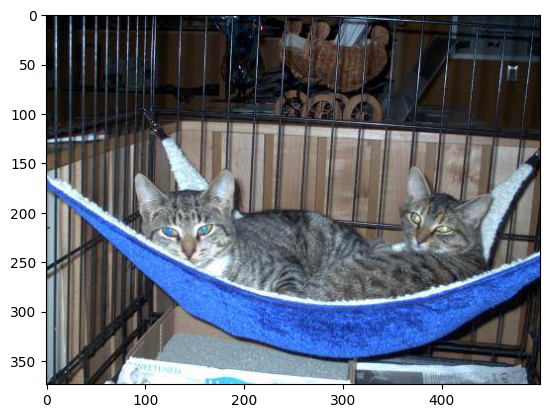

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test_set/test_set/cats/cat.4015.jpg')
print(img.shape, type(img))
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img.shape

(374, 500, 3)

In [ ]:
img

In [ ]:
img[0:3, 0:3, 0:3]

array([[[0, 2, 5],
        [0, 3, 4],
        [1, 1, 1]],

       [[0, 2, 5],
        [0, 3, 4],
        [2, 2, 2]],

       [[0, 2, 5],
        [0, 3, 4],
        [2, 2, 2]]], dtype=uint8)

(458, 499, 3) <class 'numpy.ndarray'>


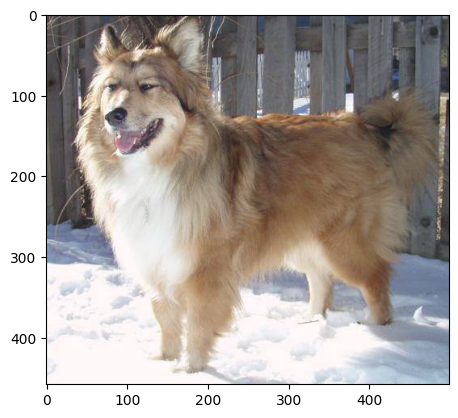

In [ ]:
img=mpimg.imread('/content/test_set/test_set/dogs/dog.4006.jpg')
print(img.shape, type(img))
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img

In [ ]:
img[0:3, 0:3, 0:3]

array([[[95, 82, 91],
        [75, 62, 69],
        [90, 79, 85]],

       [[92, 79, 88],
        [80, 67, 74],
        [84, 73, 79]],

       [[86, 73, 82],
        [88, 75, 82],
        [81, 70, 76]]], dtype=uint8)

##  Import Libraries

In [3]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [4]:
print(tensorflow.__version__)

2.12.0


## Designing the Model

#### <b> Initialize the parameters

In [5]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

#### <b> Check the shape of the image

Two ways to  to represent the image data as a three dimensional array

1. <b>  Channels Last:<b> Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

2.  <b> Channels First:<b> Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].


In [6]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)
input_shape

(150, 150, 3)

#### <b> Generate Images to train the model



1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model




In [7]:
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)
test_datagen=ImageDataGenerator (rescale=1. /255)
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

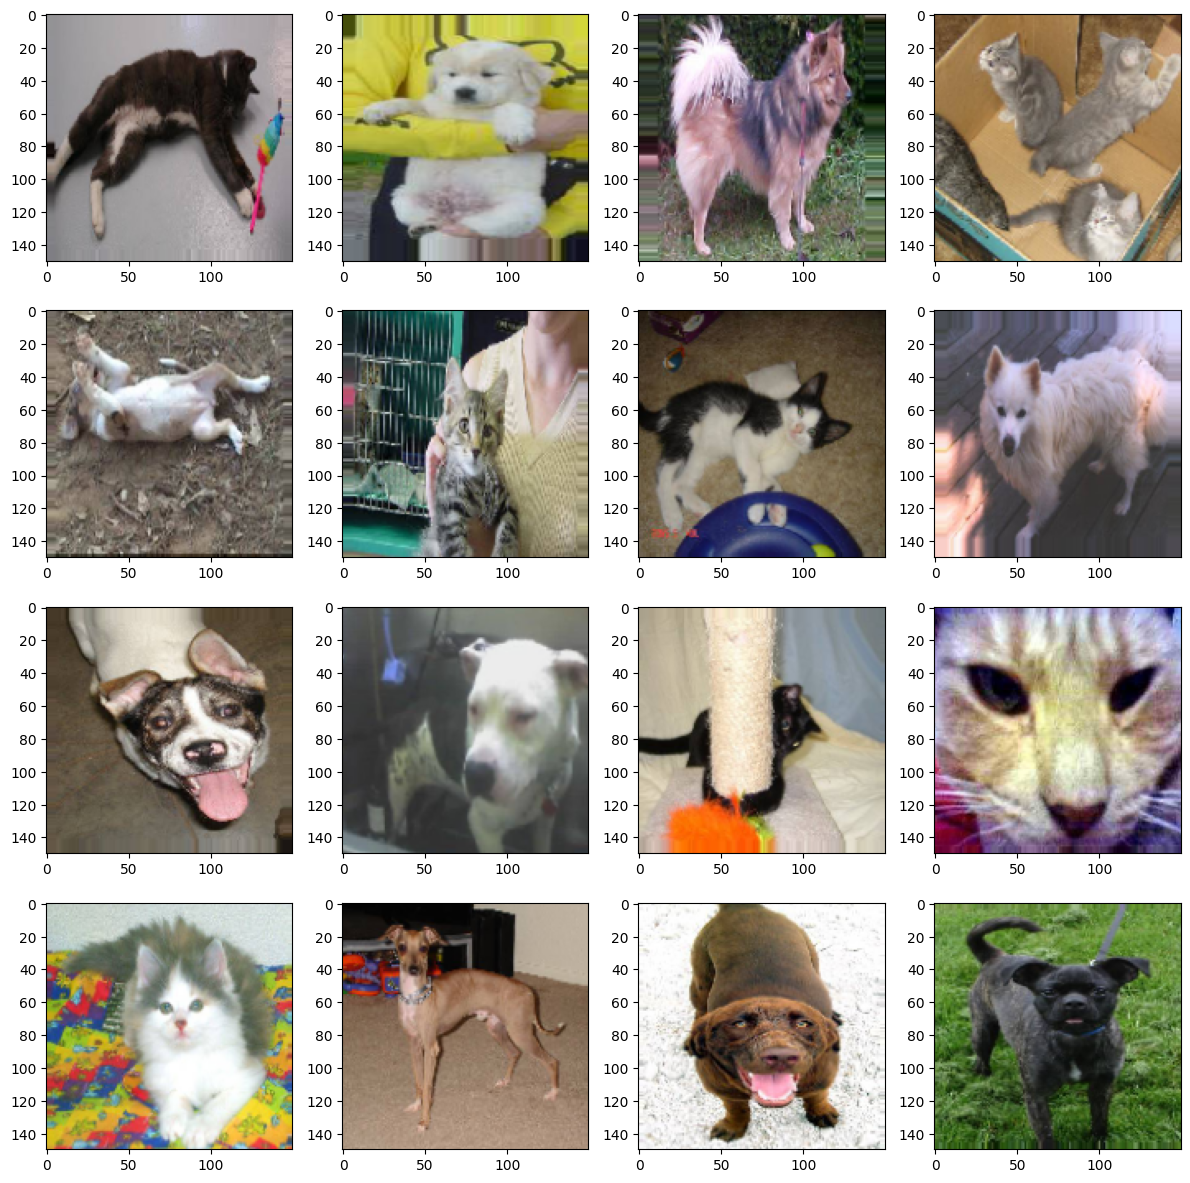

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

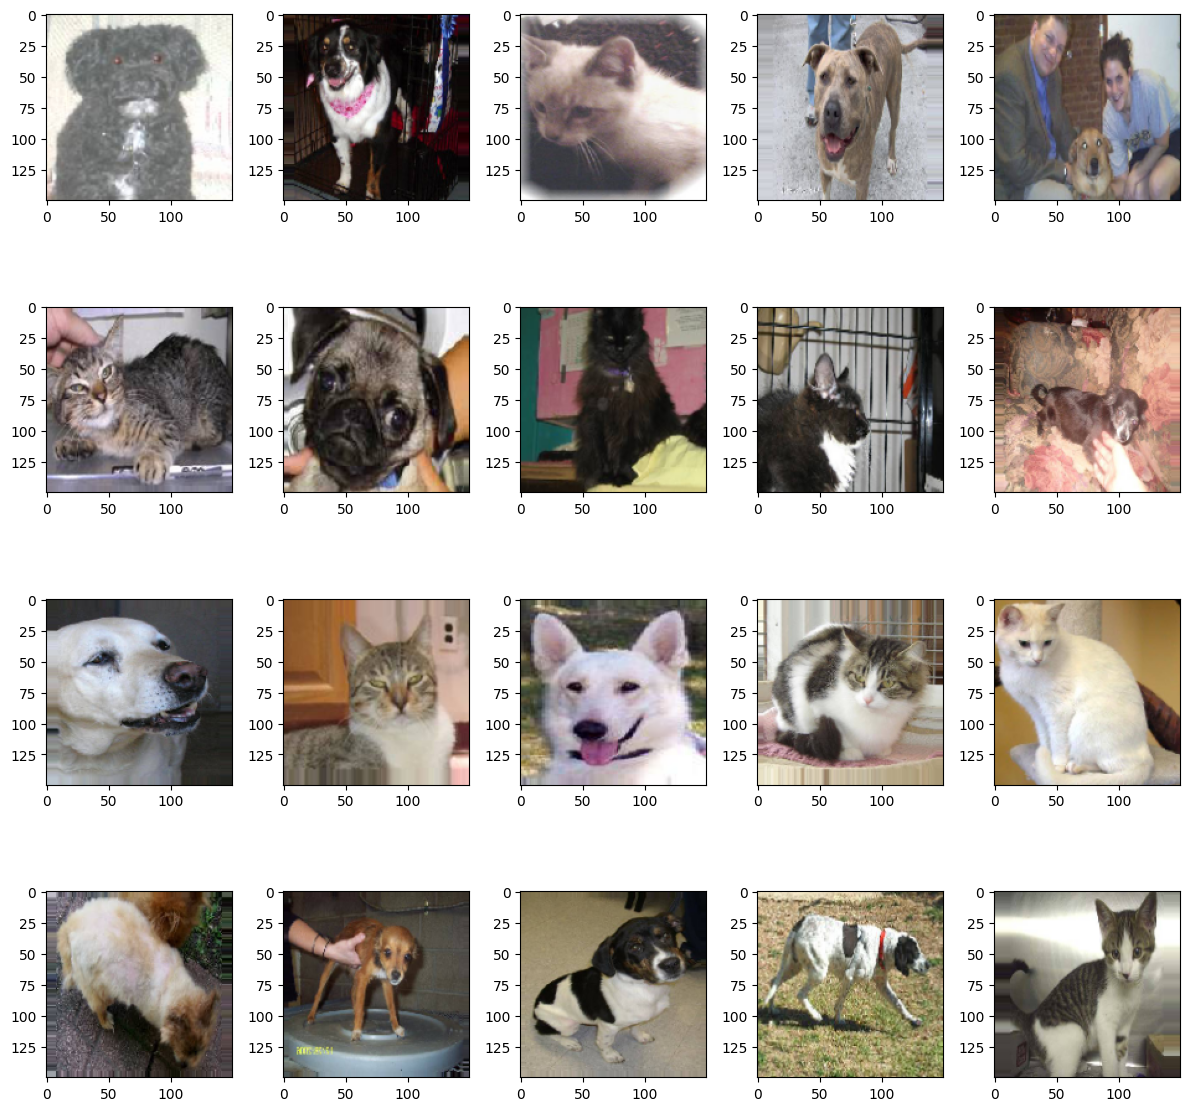

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, Y_batch in train_generator:
    for i in range(0,20):
        image = X_batch[i]
        plt.subplot(4, 5, i+1)
        plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [ ]:
Y_batch

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0.], dtype=float32)

### <b> Build the basic CNN model 0 

####<b> Layers in CNN:


<b>

1.   Convolutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


- Adding convolutional neural network in the model
- add() - Helps to add layers in the model
- Conv2D() - Convolutional layer (to extract features from the images)
- Conv2D(32,(3,3),input_shape=input_shape) 
  - 32 - Take 32 features from the given image
  - (3,3) - Metrics size of the images(3*3)
  - input_shape = image size 

- Activation function (relu) is added to remove the negative values


In [ ]:
64*350464 + 64

In [8]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape, activation='relu')) #64 filters
#This class allows to create convolutional neural network to extract feature from the images

# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64 , activation='relu')) #64 neurons with 3*3 filter 
#Numbers of output nodes in the hidden layer
#model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid')) #output layer
#model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
____________________________________________

#### <b> Compile the basic CNN model 

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.summary()

#### <b> Fit the basic CNN model 

In [ ]:
# nb_train_sample =100
# nb_validation_samples =100
# epochs =20
# batch_size= 20

In [ ]:
# training = model.fit_generator(train_generator,
#                    steps_per_epoch=nb_train_sample,epochs=epochs,
#                    validation_data=validation_generator,
#                        validation_steps=nb_validation_samples)
training = model.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 36s 258ms/step - loss: 1.6063 - accuracy: 0.5204 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 2/20
100/100 [==============================] - 20s 205ms/step - loss: 0.6933 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.4970
Epoch 3/20
100/100 [==============================] - 25s 248ms/step - loss: 0.6932 - accuracy: 0.4905 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 4/20
100/100 [==============================] - 26s 257ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 5/20
100/100 [==============================] - 25s 246ms/step - loss: 0.6931 - accuracy: 0.5110 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 6/20
100/100 [==============================] - 20s 198ms/step - loss: 0.6933 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 7/20
100/100 [==============================] - 21s 206ms/step - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6931 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


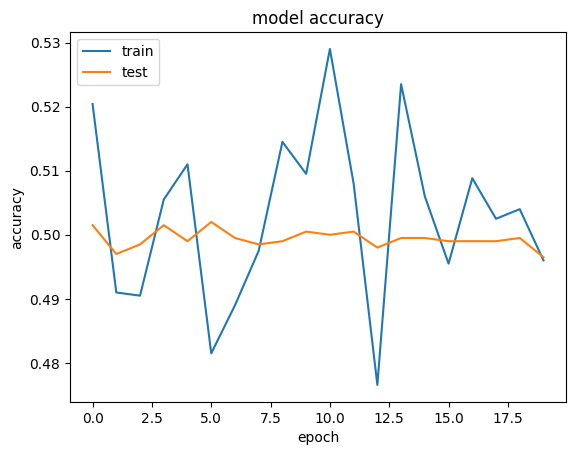

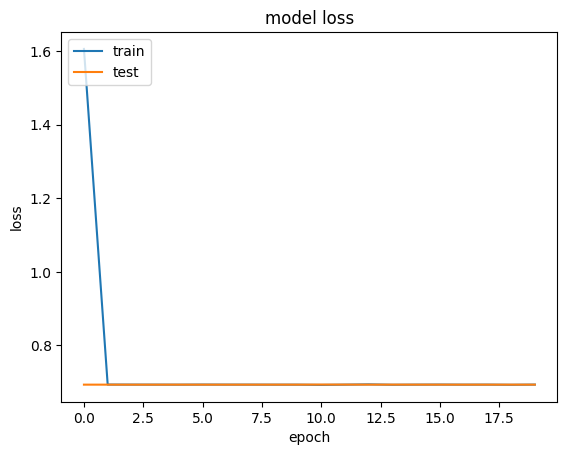

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
print(img_pred.shape)


(150, 150, 3)


In [ ]:
img_pred=np.expand_dims(img_pred, axis=0)
print(img_pred.shape)

(1, 150, 150, 3)


1/1 [==============================] - 0s 153ms/step
[[0.49806276]]
Prediction:  Cat


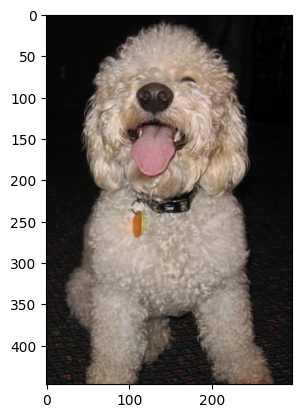

In [ ]:
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

####<b> Predict the image


1/1 [==============================] - 0s 20ms/step
[[0.49806276]]
Prediction:  Cat


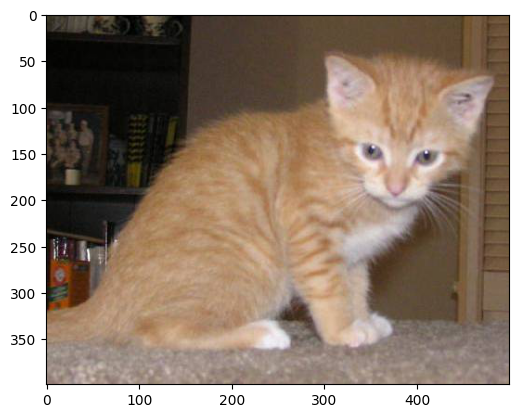

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps
- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.



In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_accuracy', patience = 10, min_delta = 0.01, mode='max')

model1 = Sequential()
#model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape, activation='relu')) #64 neurons with 3*3 filter
#model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu')) #64 neurons with 3*3 filter
#model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training 
model1.add(Dense(1, activation='sigmoid')) #output layer
#model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

#### <b> Compile the basic CNN model1 

In [11]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### <b> Fit the basic CNN model1 

In [ ]:
training = model1.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=[earlystop])

#### <b> Find the accuracy score


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)    

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_accuracy', patience = 5, min_delta = 0.01, mode='max')

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape, activation='relu')) 
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

#### <b> Compile the basic CNN model2

In [13]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### <b> Fit the basic CNN model2 

In [ ]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=[earlystop])

Epoch 1/20


<ipython-input-25-d9c6a353afbc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model2.fit_generator(train_generator,


100/100 [==============================] - 30s 264ms/step - loss: 1.0126 - accuracy: 0.4870 - val_loss: 0.9581 - val_accuracy: 0.5025
Epoch 2/20
100/100 [==============================] - 25s 250ms/step - loss: 0.6908 - accuracy: 0.5140 - val_loss: 0.9332 - val_accuracy: 0.5015
Epoch 3/20
100/100 [==============================] - 26s 261ms/step - loss: 0.6062 - accuracy: 0.4776 - val_loss: 0.7146 - val_accuracy: 0.4990
Epoch 4/20
100/100 [==============================] - 25s 251ms/step - loss: 0.6105 - accuracy: 0.5110 - val_loss: 0.6800 - val_accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 25s 251ms/step - loss: 0.5460 - accuracy: 0.4715 - val_loss: 0.7255 - val_accuracy: 0.5005
Epoch 6/20
100/100 [==============================] - 26s 260ms/step - loss: 0.5155 - accuracy: 0.4965 - val_loss: 0.6068 - val_accuracy: 0.5000


#### <b> Find the accuracy score


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 217ms/step
[[1.]]
Prediction:  Dog


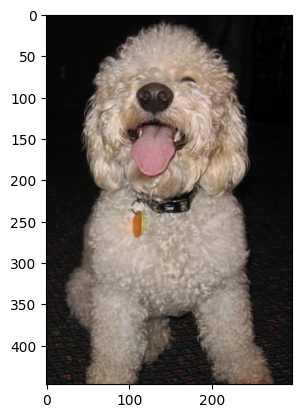

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 19ms/step
[[1.]]
Prediction:  Dog


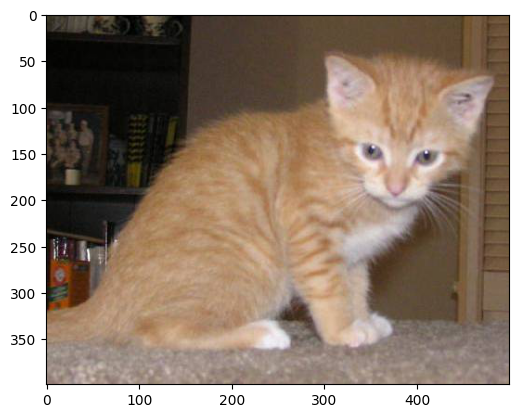

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####Freeze the model

In [ ]:

import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# serialize model to JSON
#model_json = model.to_json()
#model2 = Sequential()

model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)



model.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


[INFO] Saved model to disk


### <b> Build CNN model 3 using VGG16 pretrained model

![alt text](https://i.imgur.com/EyeXqiB.png)

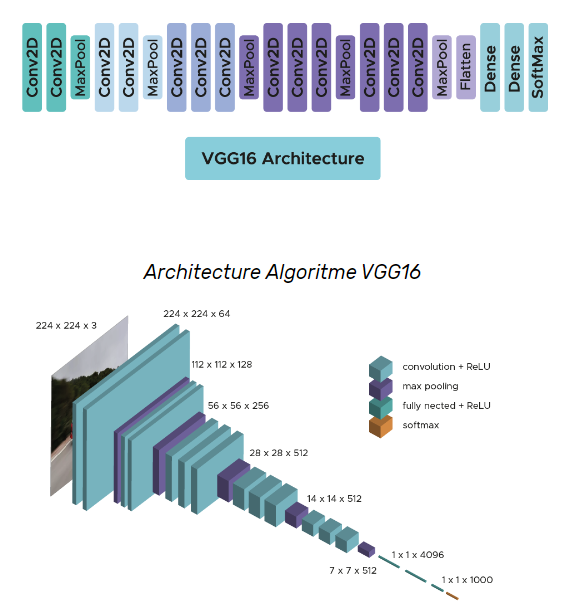

The most highly-used subset of **ImageNet** is the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification and localization dataset. This dataset spans **1000 object classes** and contains **1,281,167 training images**, 50,000 validation images and 100,000 test images. This subset is available on [Kaggle](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description).

In [14]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from keras.models import Model

image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
pre_trained_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# test_model = VGG16(input_shape=(224,224,3), include_top=True, weights="imagenet")
# test_model.summary()

In [ ]:
# input_shape2 = (224, 224, 3)
# pre_trained_model2 = VGG16(input_shape=input_shape2, include_top=True, weights="imagenet")
# pre_trained_model2.summary()

In [17]:
print(type(pre_trained_model.layers))
print(type(pre_trained_model.layers[0]))
print(type(pre_trained_model.layers[1]))
print(type(pre_trained_model.layers[2]))
print(type(pre_trained_model.layers[3]))
print(type(pre_trained_model.layers[4]))

<class 'list'>
<class 'keras.engine.input_layer.InputLayer'>
<class 'keras.layers.convolutional.conv2d.Conv2D'>
<class 'keras.layers.convolutional.conv2d.Conv2D'>
<class 'keras.layers.pooling.max_pooling2d.MaxPooling2D'>
<class 'keras.layers.convolutional.conv2d.Conv2D'>


In [18]:
print(pre_trained_model.layers[0].name)
print(pre_trained_model.layers[1].name)
print(pre_trained_model.layers[2].name)

input_1
block1_conv1
block1_conv2


In [19]:
pre_trained_model.layers[14].name

'block4_pool'

In [20]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)
model3 = Model(pre_trained_model.input, x)

In [21]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#### <b> Compile the basic CNN model3

In [22]:
model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
# model3.compile(loss='binary_crossentropy',
#               optimizer=optimizers.SGD,
#               metrics=['accuracy'])


#### <b> Fit the basic CNN model3 

In [23]:
training = model3.fit(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=[earlystop])

Epoch 1/20
100/100 [==============================] - 39s 267ms/step - loss: 0.5494 - accuracy: 0.7135 - val_loss: 0.2509 - val_accuracy: 0.8975
Epoch 2/20
100/100 [==============================] - 29s 288ms/step - loss: 0.3310 - accuracy: 0.8670 - val_loss: 0.5416 - val_accuracy: 0.8300
Epoch 3/20
100/100 [==============================] - 29s 288ms/step - loss: 0.3090 - accuracy: 0.8665 - val_loss: 0.2466 - val_accuracy: 0.8945
Epoch 4/20
100/100 [==============================] - 29s 294ms/step - loss: 0.2492 - accuracy: 0.8975 - val_loss: 0.2143 - val_accuracy: 0.9040
Epoch 5/20
100/100 [==============================] - 26s 259ms/step - loss: 0.2130 - accuracy: 0.9214 - val_loss: 0.2078 - val_accuracy: 0.9100
Epoch 6/20
100/100 [==============================] - 28s 281ms/step - loss: 0.1816 - accuracy: 0.9310 - val_loss: 0.1931 - val_accuracy: 0.9285
Epoch 7/20
100/100 [==============================] - 28s 279ms/step - loss: 0.1601 - accuracy: 0.9370 - val_loss: 0.1932 - val_ac

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


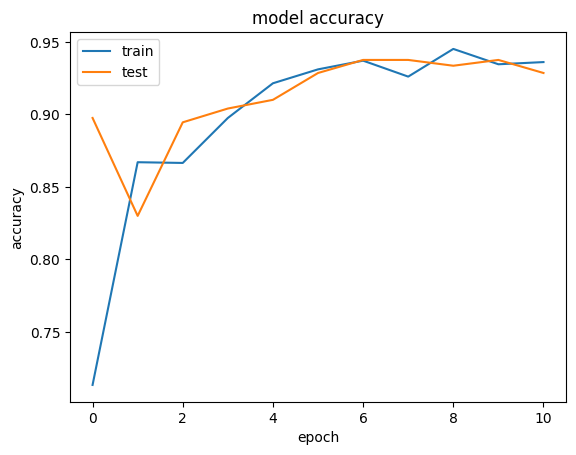

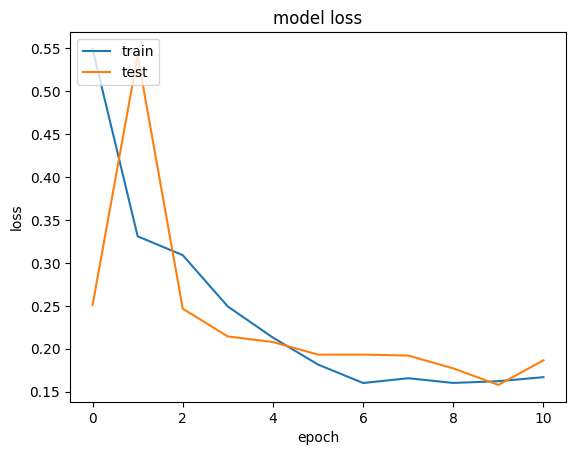

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 1s 1s/step
[[1.]]
Prediction:  Dog


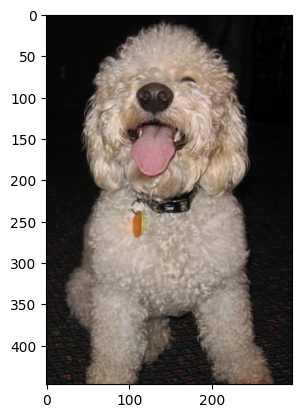

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 23ms/step
[[0.]]
Prediction:  Cat


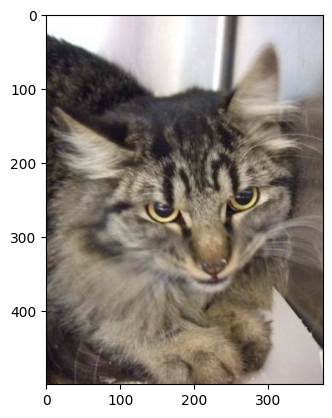

In [32]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4099.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4099.jpg')
imgplot = plt.imshow(img)
plt.show()


**After using the pre-trained model our model has much higher accuracy compared to our models created from scratch**

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with CNN and TensorFlow. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each Conv2D layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more activation layers to the network?
- What is the accuracy score if we use more dense layers in the model?
- Does manipulating the learning rate affect the model? Justify your answer.


###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
>- Add more Dense and Conv2D layers in the network
>- Try to use Different activation function
>- Increase the number of epochs to achieve high accuracy
>- Try to play with learning rate to understand the concept
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).<br>
<br>
**Dataset Description**
- **Total Images**: The dataset consists of 28,709 examples 
<br>
- Fer2013.csv  contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. 
- Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral 

![alt text](https://i.imgur.com/lGvw0Bq.png)
 


>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using convolutional neural network for classifing the images from [Fer.csv](https://www.kaggle.com/deadskull7/fer2013) with best accuracy
- Prepare the dataset for the model
- Reshape and Normalize the data:
<br>
<b>Hint:</b><br>
•	Split pixels by space to get columns 
•	reshape the input image (48,  48 ,1)<br>
•	change the type of data to float32

- Normalize & Train_Test Split 
<br>
<b>Hint:</b><br>
•	Normalize the data by dividing with 255<br>
•	Split data into train and test (90,10)

<b> Define CNN Model: </b>
- •	Layer 1<br>
•	2 Conv2d with 64 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu <br>
- •	Layer 2<br>
•	2 Conv2d with 128 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 3<br>
•	2 Conv2d with 256 filters of 3,3 filter<br> 
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 4<br>
•	Flatten layer <br>
•	Dense Layer with 128 Neuron <br>
•	BatchNormalization<br> 
•	Activation Relu <br>
•	Dropout 0.25 <br>
•	Dense 7 neurons with Softmax <br>
•	Loss: Categorical cross-entropy <br>
•	Optimizer: Adam <br>


**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?